In [2]:
# 라이브러리 정의 파트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
from mpl_toolkits import basemap
import os
import glob
import netCDF4

In [1]:
# 데이터 패스 설정
path = '/home/papalio/test_research/python_edu/test_2024/test_2024/DATA/org/sgd/2020/01/01/'

file_ta = 'sfc_grid_ta_202001010000.nc'

path_rn = '/home/papalio/test_research/python_edu/test_2024/test_2024/DATA/org/sgd/2020/01/01/'

file_rn = 'sfc_grid_rn_day_202001010000.nc'

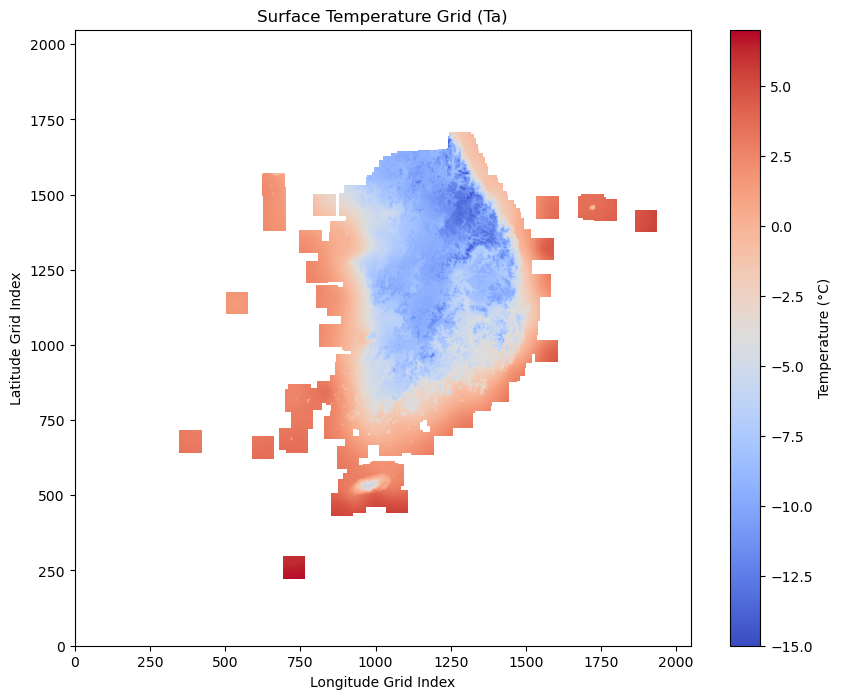

In [ ]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import os

# === 1. 파일 경로 설정 (⚠️ 경로를 수정하세요) ===
file_path = "/home/papalio/test_research/python_edu/test_2024/test_2024/DATA/org/sgd/2020/01/01/sfc_grid_ta_202001010000.nc"
save_dir = "/home/papalio/test_research/RMSE_TEST_2/IMG"  # 저장 경로
os.makedirs(save_dir, exist_ok=True)  # 폴더가 없으면 생성

# === 2. NetCDF 파일 로드 ===
ds = xr.open_dataset(file_path)

# === 3. 데이터 변수 추출 ===
data = ds["data"].values.astype(np.float32)  # int16 → float32 변환

# === 4. 결측값 처리 ===
data[data == -9990] = np.nan  # 결측값(NaN) 처리

# === 5. 데이터 스케일 변환 (필요 시 적용) ===
if "data_scale" in ds["data"].attrs:
    data /= ds["data"].attrs["data_scale"]  # 실제 기온 값 변환

# === 6. 시각화 ===
plt.figure(figsize=(10, 8))
plt.imshow(data, cmap="coolwarm", origin="lower")
plt.colorbar(label="Temperature (°C)")
plt.title("Surface Temperature Grid (Ta)")
plt.xlabel("Longitude Grid Index")
plt.ylabel("Latitude Grid Index")

# === 7. 이미지 저장 ===
save_path = os.path.join(save_dir, "sfc_grid_ta_202001010000.png")
plt.savefig(save_path, dpi=300)
plt.close()  # 메모리 절약을 위해 그래프 닫기

print(f"✅ 이미지 저장 완료: {save_path}")
